In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error#removing space
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Space Server Dataset')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df.shape

(10000, 18)

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.select_dtypes(include=['int64']).columns


Index(['run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid'], dtype='object')

In [6]:
df.select_dtypes(include=['object']).columns


Index(['class'], dtype='object')

In [7]:
df.select_dtypes(include=['float']).columns


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'specobjid', 'redshift'], dtype='object')

In [8]:
df.dtypes


objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
#Checking Presence of NaN Values
df.isnull().values.any()


False

In [10]:
df.isnull().sum()


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

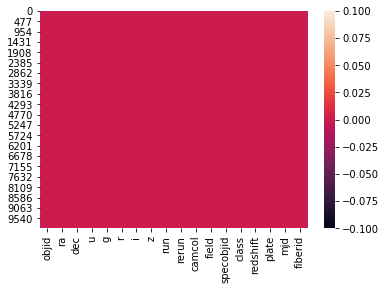

In [11]:
sns.heatmap(df.isnull())


In [12]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


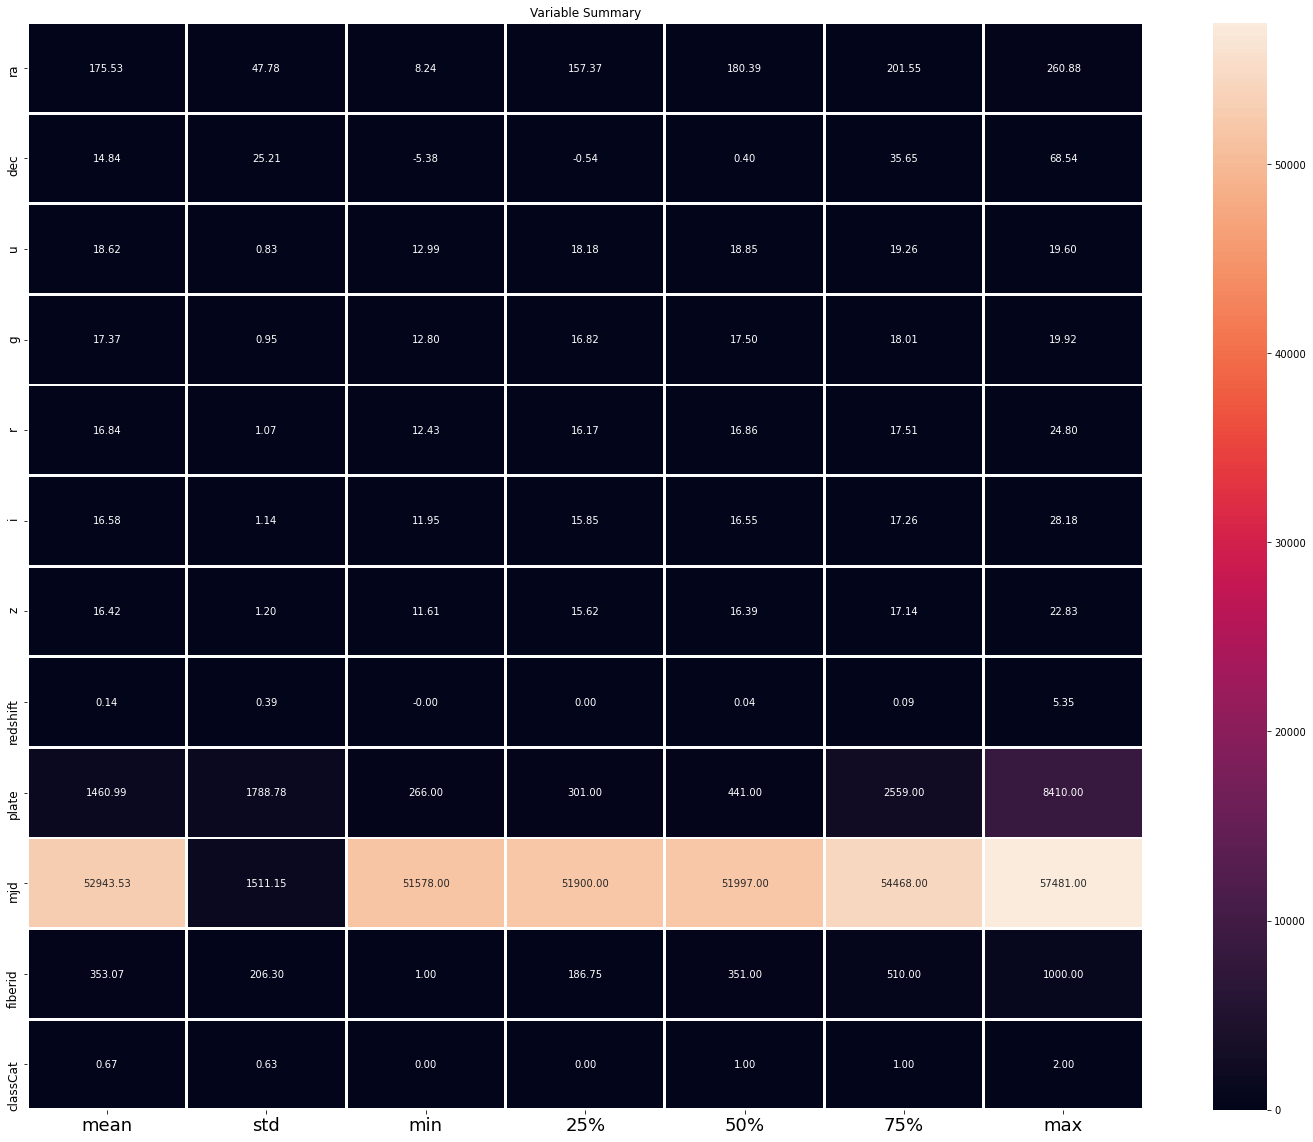

In [66]:
plt.figure(figsize=(25,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()


In [13]:
df.drop(['objid','specobjid'], axis=1, inplace=True)


In [14]:
df.shape

(10000, 16)

In [15]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


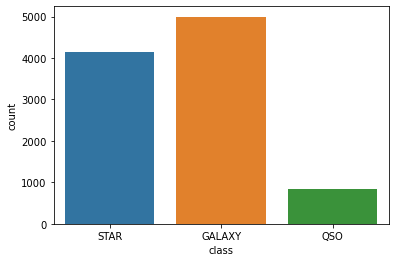

In [16]:
sns.countplot(x=df['class'])


In [17]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2



In [18]:
df['classCat'] = df['class'].apply(change_category_to_number)


In [19]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512,0


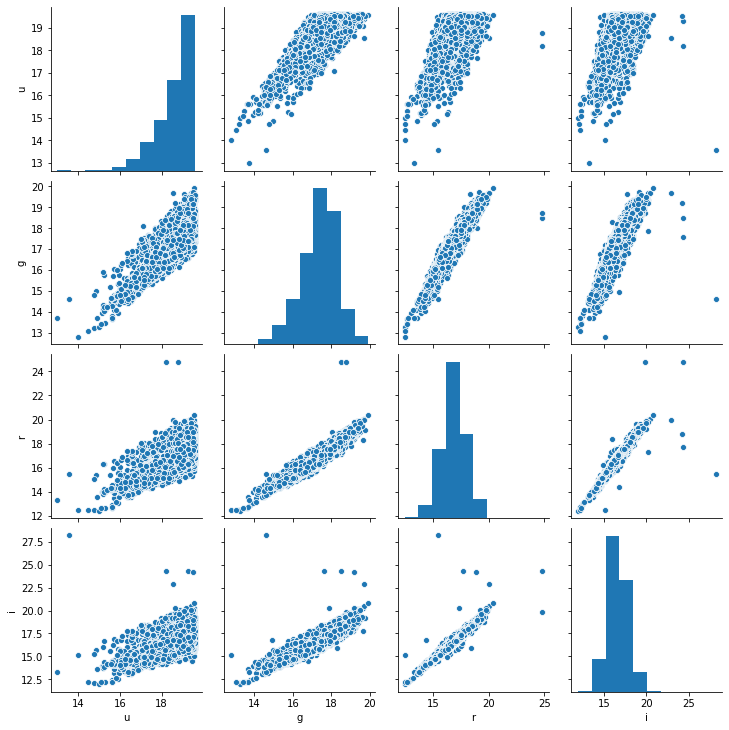

In [20]:
sns.pairplot(df[['u','g','r','i']])


In [21]:
df.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True)


In [22]:
df.head()


,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,0


In [23]:
df.dtypes


ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
redshift    float64
plate         int64
mjd           int64
fiberid       int64
classCat      int64
dtype: object

In [24]:
X = df.drop('classCat', axis=1)
y = df['classCat']


# Perform train and test split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

# Decision Tree Classifier


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=10,random_state=1)


In [27]:
dtClassifer.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

# Prediction on test data


In [28]:
prediction = dtClassifer.predict(X_test)

In [29]:
prediction[:10]

array([0, 1, 0, 0, 1, 1, 0, 2, 1, 1], dtype=int64)

In [30]:
y_test[:10]

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

# Measure accuracy of the classifier

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=prediction)


0.9893333333333333

# Logistic Regression Classifier

In [32]:
lrClassifier = LogisticRegression()


In [33]:
lrClassifier.fit(X_train,y_train)


C:\Users\rrd\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction on test data

In [34]:
prediction = lrClassifier.predict(X_test)


In [35]:
prediction[:10]


array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [36]:
y_test[:10]


7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

Measure accuracy of the model


In [37]:
accuracy_score(y_true=y_test, y_pred=prediction)


0.794

In [38]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
model=RandomForestClassifier()


In [40]:
model.fit(X_train,y_train)


RandomForestClassifier()

In [41]:
model.score(X_train,y_train)


1.0

In [42]:
model.score(X_test,y_test)


0.9903333333333333

In [43]:
from sklearn.metrics import confusion_matrix


In [44]:
cm=confusion_matrix(y_test,model.predict(X_test))
print(cm)


[[1237    0    0]
 [   8 1484    5]
 [   1   15  250]]


In [45]:
from sklearn.svm import SVC
model=SVC()

In [46]:
model.fit(X_train,y_train)

SVC()

In [47]:
model.score(X_train,y_train)


0.798

In [64]:
model.score(X_test,y_test)


0.794